# Programming Exercise 1: Linear Regression
## Machine Learning


### Introduction
In this exercise, you will implement linear regression and get to see it work
on data.

目录：
- [1.Simple function](#1) 
- [2.Linear regression with one variable](#2)
    - 2.1 Plotting the Data
    - 2.2 Gradient Descent
        - 2.2.1 Update Equations
        - 2.2.2 Implementation
        - 2.2.3 Computing the cost J(θ)
        - 2.2.4 Gradient descent
    - 2.4 Visualizing J(θ)
- [3 Linear regression with multiple variables](#3)
    - 3.1 Feature Normalization
    - 3.2 Gradient Descent
        - 3.2.1 Optional (ungraded) exercise: Selecting learning rates
    - 3.3 Normal Equations

导入相关的包，这里我就直接导入了

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a name='1'> </a>
## 1.Simple function ##

请你返回一个5x5的单位矩阵

In [2]:
## 你的答案在这里，提示可以用np.eye()来实现
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

答案应该为这样：
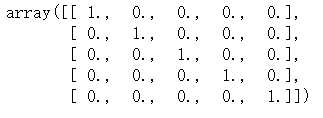

<a name="2"></a>
## 2.Linear regression with one variable ##

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [3]:
# 让我们来导入这个数据看看吧
data = pd.read_csv("ex1_data/ex1data1.txt",names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

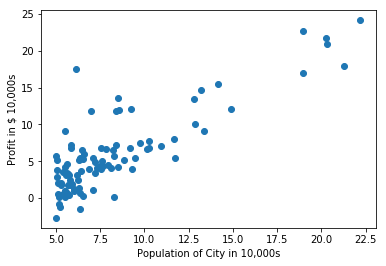

In [4]:
X =  data.population          #你的代码写在这里括号这里,提示X是population,y是profit利润
y =  data.profit               
plt.scatter(X,y) 
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $ 10,000s")
plt.show()


你的结果应该和下图一致
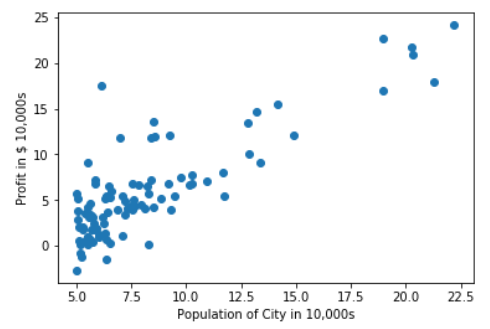

### 2.2 Gradient Descent ###
In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.
#### 2.2.1 Update Equations ####
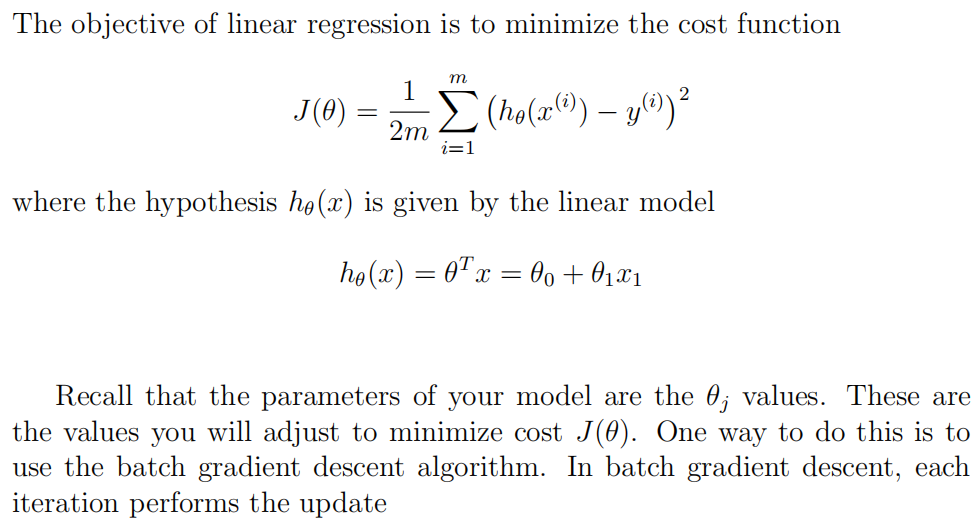

#### 2.2.2 Implementation ####
请你自己动手实现代价函数J(θ),公式就在上面的图片中

我们还要在X上增加额外的一列x,来匹配截距。

我们还将初始参数初始化为0，将学习速率alpha初始化为0.01。

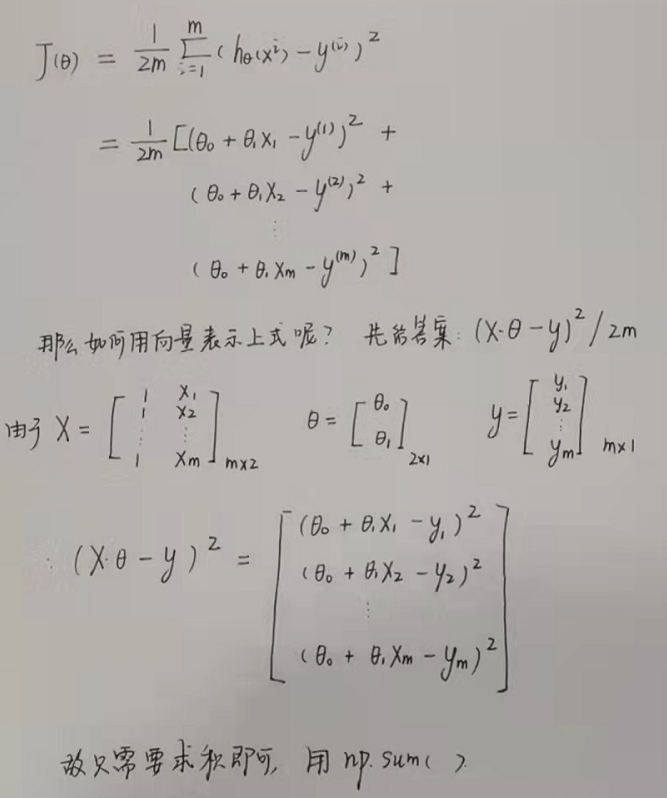

In [5]:
def J(X, y, theta):
    cost = np.sum((X.dot(theta)-y)**2)/(2*len(X))#你的代码填在这里，提示:要把上述公式向量化，视频课里面有讲，去看
    return cost

In [6]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data = np.array(data) # 把data转换为numpy数组，方便等会儿计算代价函数

In [8]:
type(data)

numpy.ndarray

In [9]:
X = data[:,0].reshape(-1,1) # 把X取出来，X为人口，population


In [10]:
X = np.hstack([np.ones((len(X),1)),X])         # 代码写在这里，这部分请你给X添加一列全为1的元素，使用np.hstack，水平方向堆叠
                                     # 使用np.ones可以生成一列元素

In [11]:
y = data[:,1].reshape(-1,1)  # 把y取出来，也就是利润

In [12]:
theta = np.zeros(X.shape[1]).reshape(-1,1)      # 代码写在这里，将theta初始化为0，注意维度哦

### 2.2.3 Computing the cost J(θ) ###
调用你之前写的方法

In [13]:
round(J(X,y,theta),2)  # 得到一个初始的代价函数值，非常高对吧

32.07

答案为32.07，运行上面单元格进行对比一下

### 2.2.4 Gradient descent ###
你现在得自己实现梯度下降了，该怎么实现？

`请注意你的学习率为0.01,迭代次数为1500次`
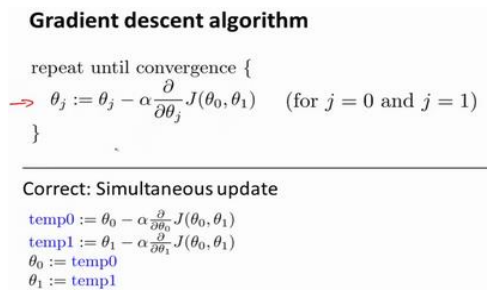

根据上面得公式，我们发现，梯度下降的目的其实是为了求一个最好的参数，使得代价函数最小。根据公式

我们要先求得代价函数的导数，再来求梯度下降，所以我们要写出两个方法，框架我我已经写好。

提示：

将上述公式展开，为
$\theta_j=\theta_j-\alpha\cdot\frac{\alpha}{\alpha\theta_j}\frac{1}{2m}\sum\limits_{i=1}^m(h_\theta(x^{i})-y^i)^2$


那我对$\frac{1}{2m}\sum\limits_{i=1}^m(h_\theta(x^{i})-y^i)^2$中的$\theta_1$求导，结果等于多少呢

不难求出答案为：$\frac{1}{m}\sum\limits_{i=1}^m(h_\theta(x^{i})-y^i)x_j^i$



In [14]:
def dJ(theta, X, y):# 这个方法传入的参数，跟传J方法的参数是一样的,注意我们是对θ求导,对上述公式向量化
    res =  X.T.dot(X.dot(theta)-y)/len(X) # 你的答案填在这里
    return res

def gradient_descent(dJ, X, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iters = 0
    while cur_iters<n_iters:
        gradient =  dJ(theta, X, y)             #这三行代码你需要自己填写，如何计算theta，根据上述公式
        last_theta = theta
        theta = theta - eta*gradient
        if(abs(J(X, y, theta)-J(X, y, last_theta))<epsilon):
            break
        cur_iters+=1
    return theta
        
        
    

In [15]:
theta = np.zeros(X.shape[1]).reshape(-1,1)
theta = gradient_descent(dJ, X, y, theta,eta=0.01, n_iters=1500)
theta

array([[-3.63029144],
       [ 1.16636235]])

你的答案应该为：
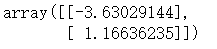

现在求到了最佳的theta，也就是直线的截距和斜率

那么你能求得3w5和7w人口城市的小吃车的利润吗？显然是y=$\theta_1x+\theta_0$,同样，我们要向量化可以加快速度，不向量化也可

In [18]:
predict1 = np.array([1,3.5]).dot(theta)
predict2 = np.array([1,7]).dot(theta)
print("3w5人口的城市的小吃车利润为：",predict1)
print("7w人口的城市的小吃车利润为：",predict2)

3w5人口的城市的小吃车利润为： [0.45197679]
7w人口的城市的小吃车利润为： [4.53424501]


你的答案应该为
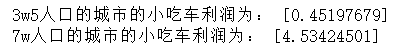

现在可视化一下

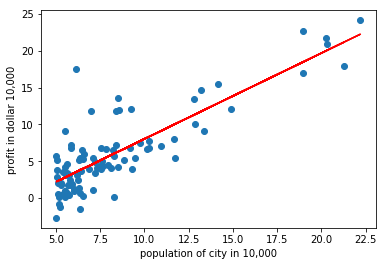

In [17]:
plt.scatter(data[:,0],data[:,1])
plt.plot(X[:,1], X.dot(theta), color='r')
plt.xlabel("population of city in 10,000")
plt.ylabel("profit in dollar 10,000")
plt.show()